OpenCV Tutorial : https://www.geeksforgeeks.org/opencv-python-tutorial/

In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
img = cv2.imread("landscape_uneq.jpeg", cv2.IMREAD_COLOR)


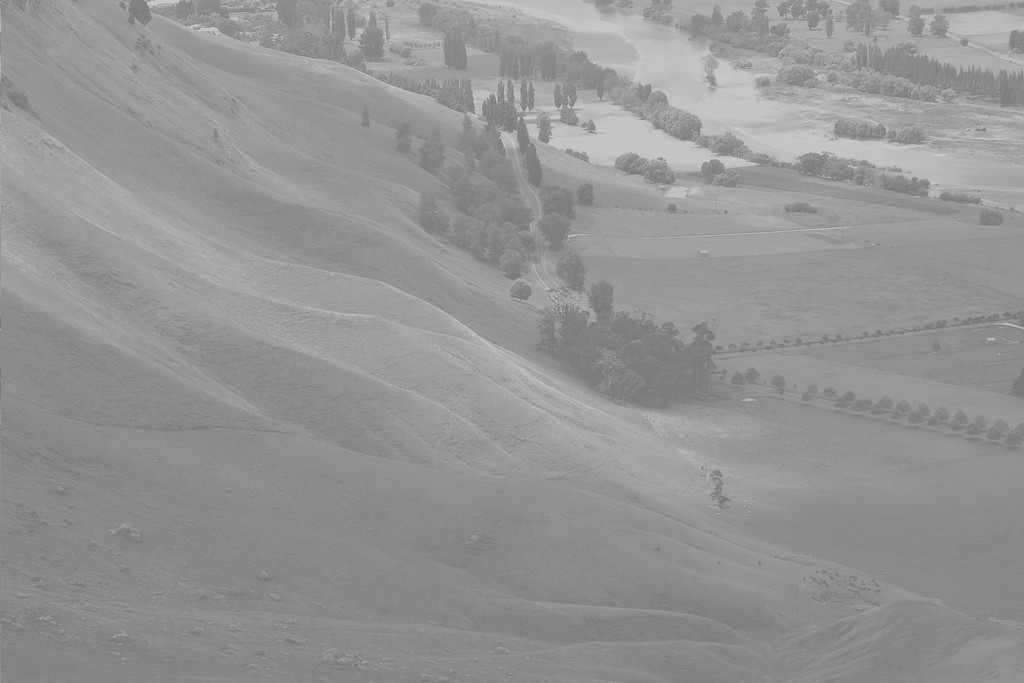

In [3]:
from google.colab.patches import cv2_imshow
# cv2.imshow("image", img)
cv2_imshow(img)

In [ ]:
# To hold the window on screen, we use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
cv2.waitKey(0)

# It is for removing/deleting created GUI window from screen
# and memory
cv2.destroyAllWindows()

In [ ]:
img.shape

(683, 1024, 3)

In [ ]:
type(img)

numpy.ndarray

# Image Histogram & Equalisation

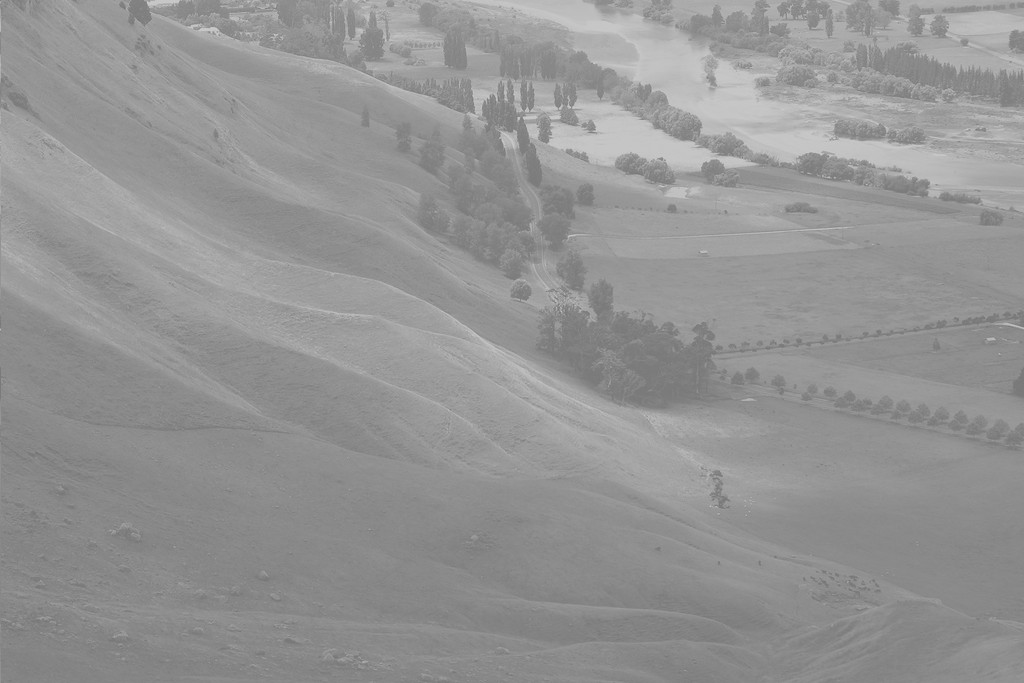

In [5]:
img1 = cv2.imread("landscape_uneq.jpeg", 0)
cv2_imshow(img1)

**cv2.calcHist(image, channel, mask, histSize, range)**

images : it is the source image of type uint8 or float32 represented as “[img]”.

channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”.

histSize : this represents our BIN count. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].
   


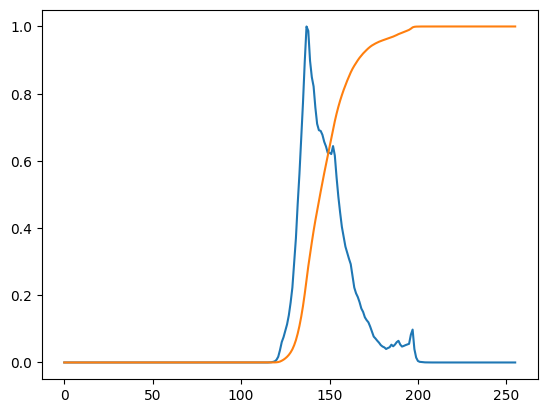

In [6]:
histr = cv2.calcHist([img1],[0],None,[256],[0,256])
cdf = histr.cumsum()

# show the plotting graph of an image
plt.plot(histr/max(histr))
plt.plot(cdf/max(cdf))
plt.show()

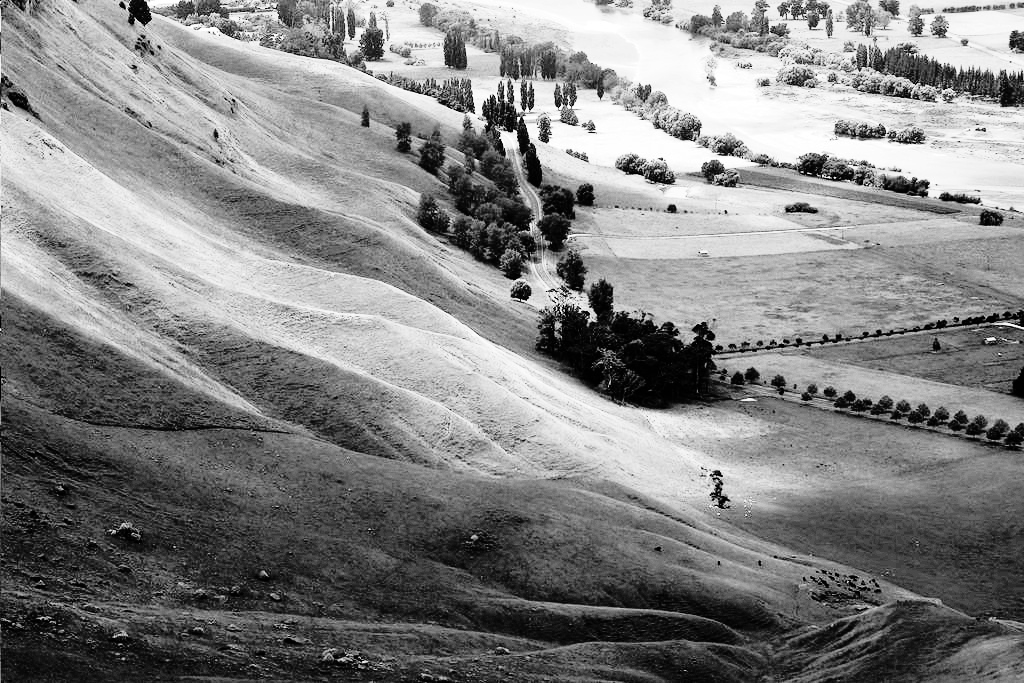

In [8]:
equ = cv2.equalizeHist(img1)
cv2_imshow(equ)

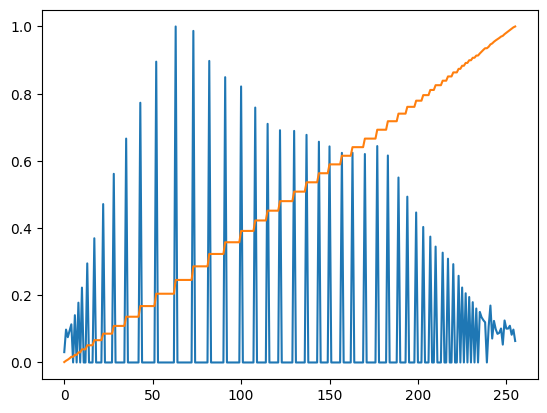

In [9]:
histr = cv2.calcHist([equ],[0],None,[256],[0,256])
cdf = histr.cumsum()

# show the plotting graph of an image
plt.plot(histr/max(histr))
plt.plot(cdf/max(cdf))
plt.show()

Algo for Histogram Equalisation:

https://medium.com/jungletronics/histogram-equalization-34149fc299a6

**DIY:**

Find out how to do equalisation for color images

# Denoising using Filters

In [ ]:
noisy = np.zeros(img.shape, np.uint8)

In [ ]:
p = 0.2

#traversing throughout the image pixels
for i in range(img.shape[0]): #rows
    for j in range(img.shape[1]): #cols
        r = random.random()
        if r < p / 2:
            noisy[i][j] = [0, 0, 0] #black noise
        elif r < p:
            noisy[i][j] = [255, 255, 255] #white noise
        else:
            noisy[i][j] = img[i][j] #original image pixel

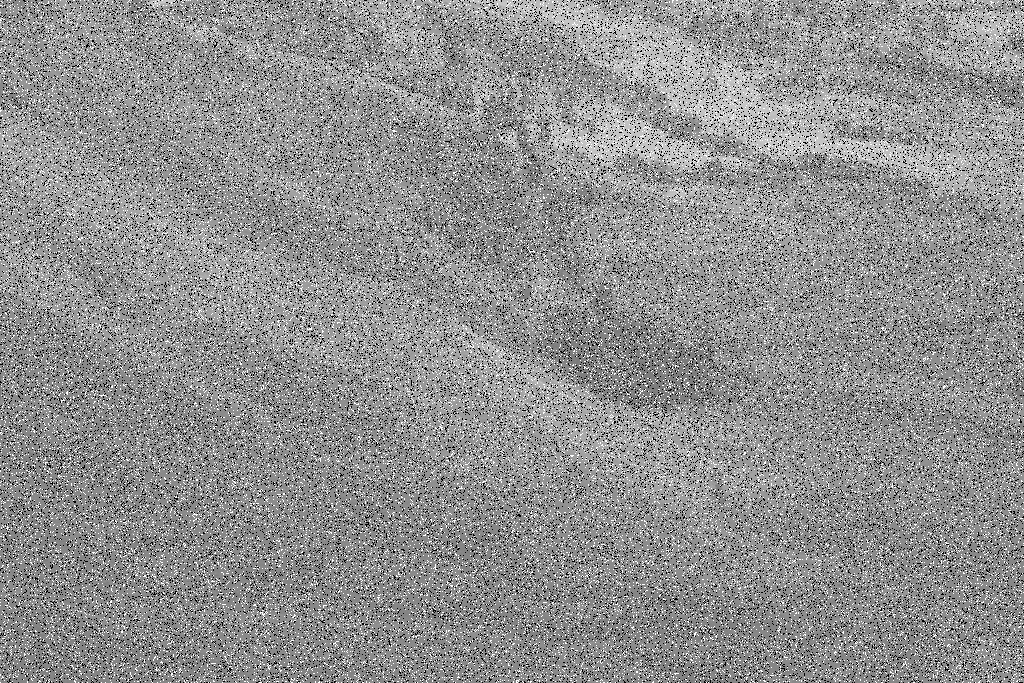

In [ ]:
cv2_imshow(noisy)

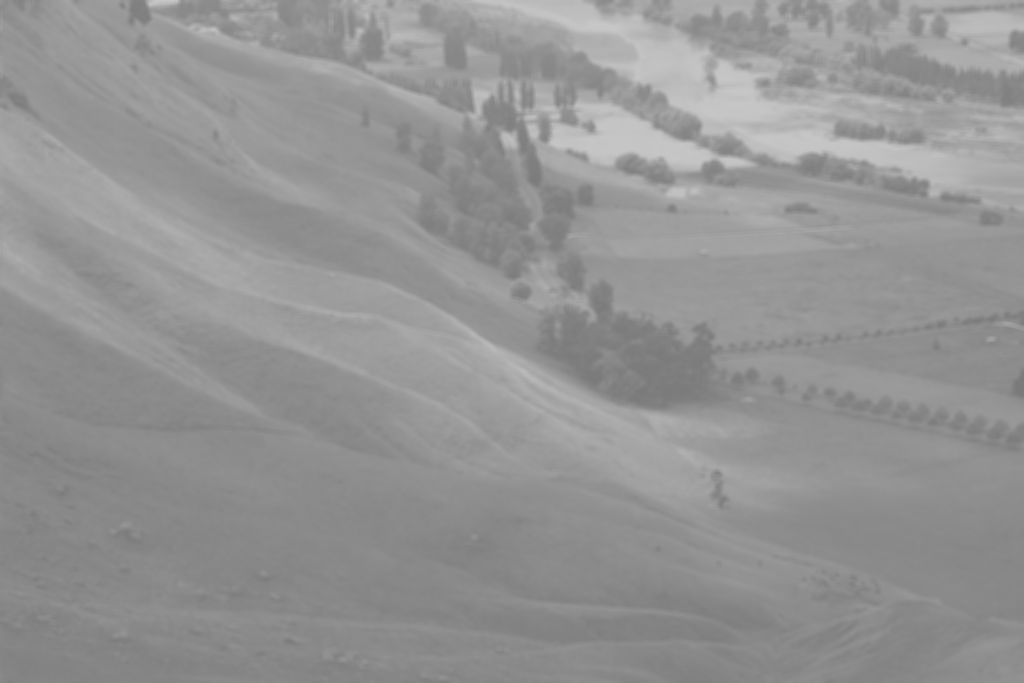

In [ ]:
# Averaging
cv2_imshow(cv2.blur(img,(5,5)))

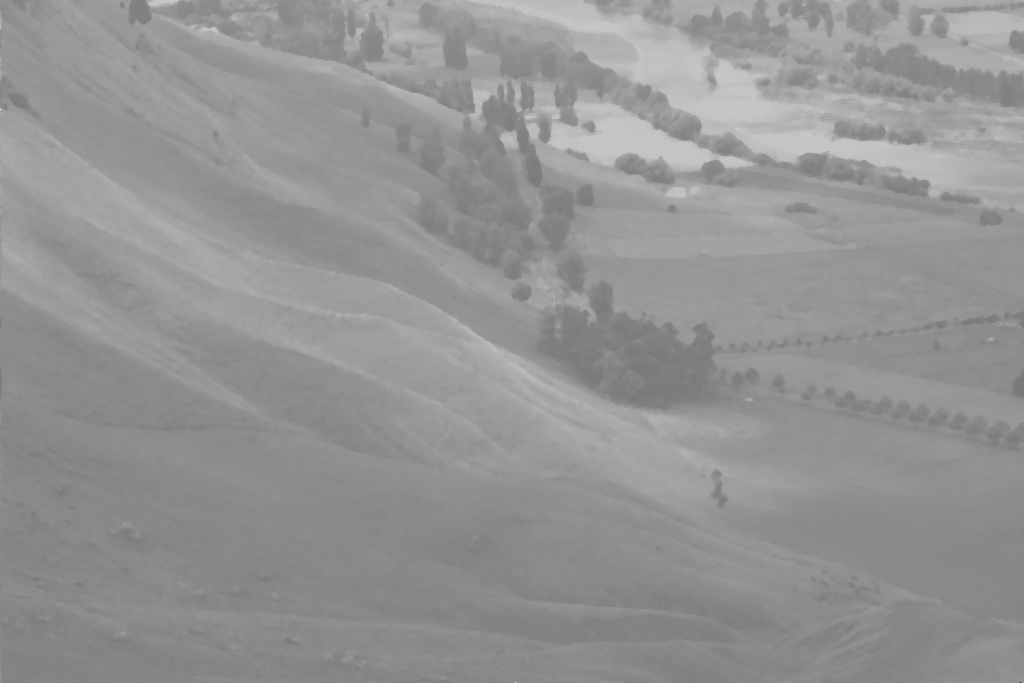

In [ ]:
# Median Blur

denoised = cv2.medianBlur(noisy, 5)
cv2_imshow(denoised)

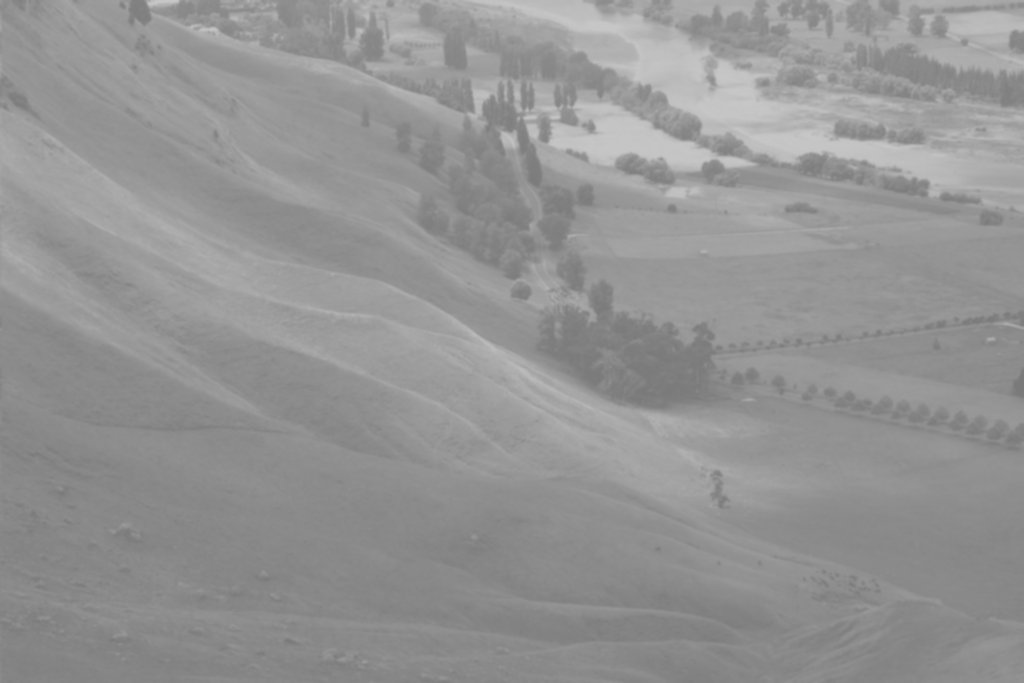

In [ ]:
cv2_imshow(cv2.GaussianBlur(img,(5,5),0))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/histogram.cpp:3440: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'equalizeHist'


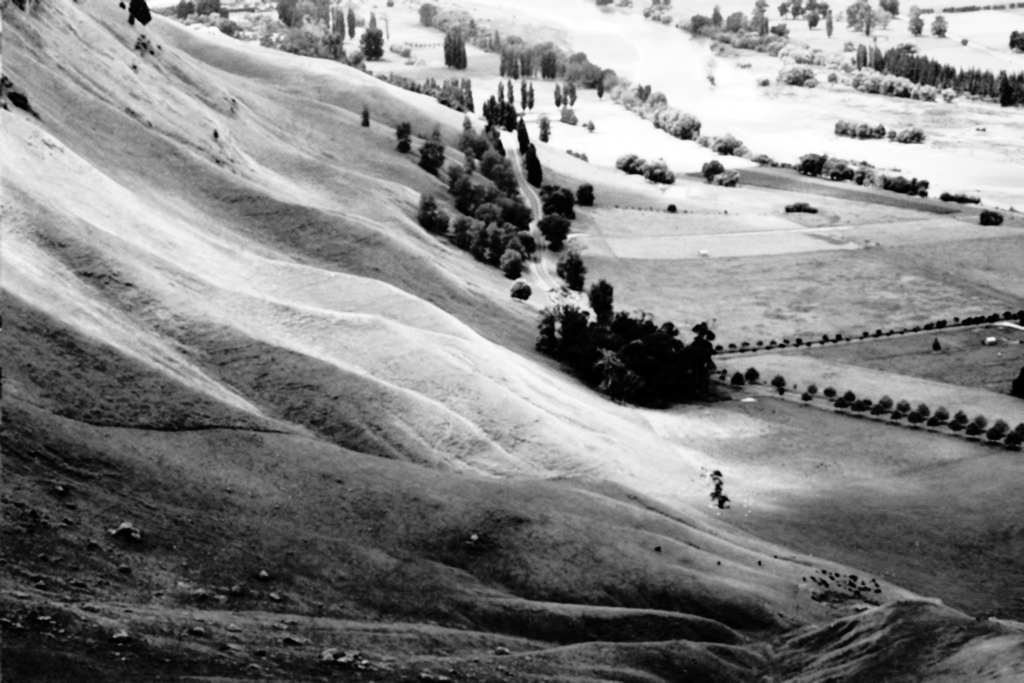

In [ ]:
blurred_img = cv2.GaussianBlur(img,(5,5),0)
gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)

equ1 = cv2.equalizeHist(gray_img)
cv2_imshow(equ1)

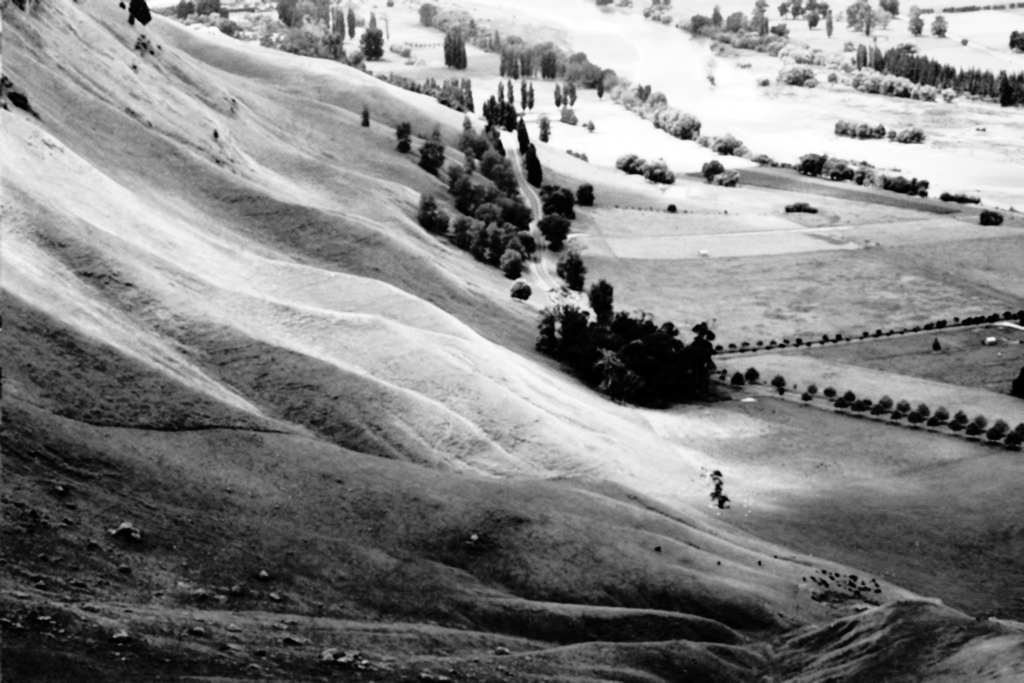

In [ ]:
equ2 = cv2.equalizeHist(blurred_img[:,:,0])
cv2_imshow(equ2)

In [ ]:
equ_diff = equ1-equ2
len(equ_diff[equ_diff > 0])

0